In [80]:
import pandas as pd

# merged_data = pd.read_csv('merged_train_data.csv')
# merged_data=merged_data.rename(columns={'0.1':'label'})

merged_data = pd.read_csv('processed_df.csv')
ytrainall = pd.read_csv('y_train_all.csv')
merged_data = pd.concat([merged_data,ytrainall],axis = 1)
merged_data=merged_data.rename(columns={merged_data.columns[-1]:'label'})
merged_data=merged_data.rename(columns={merged_data.columns[0]:'labels'})
merged_data=merged_data.drop(columns =['labels'])
merged_data.columns.values[0] = '0'

In [81]:
merged_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-121,83,104,124,-93,-74,-86,-107,-107,0
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-114,120,90,53,80,-120,-58,-51,-51,0
2,85,106,120,113,118,-128,-100,-100,77,78,...,-114,124,102,78,73,104,-107,-72,-51,0
3,57,78,99,106,-116,-93,-96,116,29,113,...,120,109,99,100,87,88,113,-86,-58,0
4,99,99,92,85,106,123,-100,-93,77,57,...,113,-121,-95,-90,-110,-122,64,78,99,0


In [82]:
from sklearn.svm import SVC

x = merged_data.drop('label',axis=1)
y = merged_data['label']

svm = SVC(kernel='linear', decision_function_shape='ovr')

svm.fit(x, y)

SVC(kernel='linear')

In [83]:
feature_weights = svm.coef_

In [84]:
import numpy as np
k = 20
selected_features_per_class = {}
for class_label in range(10): 
    feature_ranking = np.argsort(np.abs(feature_weights[class_label]))
    selected_features = feature_ranking[:k]
    selected_features_per_class[class_label] = selected_features

print(selected_features_per_class)

{0: array([1599,   76,  595,  908,  916, 1859,  379, 1282,  839,  755,  211,
        994, 1332, 1844,  869,  551, 1046, 1984, 2254, 1841]), 1: array([1468,  484,  562,  743,  750, 2131,  375, 1228,   62,  190, 1885,
       1711, 2201,  647, 1866, 1783, 2249, 1369,   76,  656]), 2: array([ 619,  541, 1601,  495, 1760, 1119,  916,  721,  954, 1976, 1821,
       1456, 1689,  538,  615, 1695,  690, 2083,  989, 1024]), 3: array([1746, 1214, 2169,  548,  238,  589,  992,   66, 1799,  310, 1244,
       1327, 1664, 2112, 2216,  955,  351, 1691,  443,  193]), 4: array([ 391, 1677, 1922, 1820,  129,  204, 1421,  163,  739, 1683,  860,
        357, 1737, 1988, 1467,  746,  875,   85, 1170, 1116]), 5: array([1652,  773, 1815,  182,  225, 1301, 1190, 1086,  271, 1367, 1444,
       2047, 1632, 1831, 1028,  897,  134, 1688,  342,  489]), 6: array([ 607, 1650, 1643,  598, 1188, 1751,  290, 2091, 1160,  285, 1309,
       1250,  180,  277,  814, 1339, 1258,  674, 1548, 1610]), 7: array([2255, 1770, 1594

In [99]:
xtrain = pd.read_csv('processed_df.csv')
xtrain = xtrain.rename(columns={xtrain.columns[0]:'labels'})
xtrain = xtrain.drop(columns=['labels'])
ytrain0 = pd.read_csv('y_train_0.csv')
ytrain1 = pd.read_csv('y_train_1.csv')
ytrain2 = pd.read_csv('y_train_2.csv')
ytrain3 = pd.read_csv('y_train_3.csv')
ytrain4 = pd.read_csv('y_train_4.csv')
ytrain5 = pd.read_csv('y_train_5.csv')
ytrain6 = pd.read_csv('y_train_6.csv')
ytrain7 = pd.read_csv('y_train_7.csv')
ytrain8 = pd.read_csv('y_train_8.csv')
ytrain9 = pd.read_csv('y_train_9.csv')


In [100]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-115,-121,83,104,124,-93,-74,-86,-107,-107
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-118,-114,120,90,53,80,-120,-58,-51,-51
2,85,106,120,113,118,-128,-100,-100,77,78,...,-108,-114,124,102,78,73,104,-107,-72,-51
3,57,78,99,106,-116,-93,-96,116,29,113,...,-66,120,109,99,100,87,88,113,-86,-58
4,99,99,92,85,106,123,-100,-93,77,57,...,-128,113,-121,-95,-90,-110,-122,64,78,99


In [103]:
#xy0 = pd.concat([xtrain.iloc[:,int(selected_features_per_class[0][0])],xtrain.iloc[:,int(selected_features_per_class[0][1])]],axis= 1)

xy0_20 = None
for i in selected_features_per_class[0]:
    xy0_20 = pd.concat([xy0_20,xtrain.iloc[:,int(i)]],axis=1)
xy0_20 = pd.concat([xy0_20,ytrain0],axis=1)
xy0_20 = xy0_20.rename(columns={xy0_20.columns[-1]:'label'})
print(xy0_20)
    
xy1_20 = None
for i in selected_features_per_class[1]:
    xy1_20 = pd.concat([xy1_20,xtrain.iloc[:,int(i)]],axis=1)
xy1_20 = pd.concat([xy1_20,ytrain0],axis=1)
xy1_20 = xy1_20.rename(columns={xy1_20.columns[-1]:'label'})
print(xy1_20)

xy2_20 = None
for i in selected_features_per_class[2]:
    xy2_20 = pd.concat([xy2_20,xtrain.iloc[:,int(i)]],axis=1)
xy2_20 = pd.concat([xy2_20,ytrain0],axis=1)
xy2_20 = xy2_20.rename(columns={xy2_20.columns[-1]:'label'})
print(xy2_20)

xy3_20 = None
for i in selected_features_per_class[3]:
    xy3_20 = pd.concat([xy3_20,xtrain.iloc[:,int(i)]],axis=1)
xy3_20 = pd.concat([xy3_20,ytrain0],axis=1)
xy3_20 = xy3_20.rename(columns={xy3_20.columns[-1]:'label'})
print(xy3_20)

xy4_20 = None
for i in selected_features_per_class[4]:
    xy4_20 = pd.concat([xy4_20,xtrain.iloc[:,int(i)]],axis=1)
xy4_20 = pd.concat([xy4_20,ytrain0],axis=1)
xy4_20 = xy4_20.rename(columns={xy4_20.columns[-1]:'label'})
print(xy4_20)

xy5_20 = None
for i in selected_features_per_class[5]:
    xy5_20 = pd.concat([xy5_20,xtrain.iloc[:,int(i)]],axis=1)
xy5_20 = pd.concat([xy5_20,ytrain0],axis=1)
xy5_20 = xy5_20.rename(columns={xy5_20.columns[-1]:'label'})
print(xy5_20)

xy6_20 = None
for i in selected_features_per_class[6]:
    xy6_20 = pd.concat([xy6_20,xtrain.iloc[:,int(i)]],axis=1)
xy6_20 = pd.concat([xy6_20,ytrain0],axis=1)
xy6_20 = xy6_20.rename(columns={xy6_20.columns[-1]:'label'})
print(xy6_20)

xy7_20 = None
for i in selected_features_per_class[7]:
    xy7_20 = pd.concat([xy7_20,xtrain.iloc[:,int(i)]],axis=1)
xy7_20 = pd.concat([xy7_20,ytrain0],axis=1)
xy7_20 = xy7_20.rename(columns={xy7_20.columns[-1]:'label'})
print(xy7_20)

xy8_20 = None
for i in selected_features_per_class[8]:
    xy8_20 = pd.concat([xy8_20,xtrain.iloc[:,int(i)]],axis=1)
xy8_20 = pd.concat([xy8_20,ytrain0],axis=1)
xy8_20 = xy8_20.rename(columns={xy8_20.columns[-1]:'label'})
print(xy8_20)

xy9_20 = None
for i in selected_features_per_class[9]:
    xy9_20 = pd.concat([xy9_20,xtrain.iloc[:,int(i)]],axis=1)
xy9_20 = pd.concat([xy9_20,ytrain0],axis=1)
xy9_20 = xy9_20.rename(columns={xy9_20.columns[-1]:'label'})
print(xy9_20)

    

      1599  76  595  908  916  1859  379  1282  839  755  ...  994  1332  \
0       71  -8  -76  114   80   104 -113  -113  -10  -81  ...   84    96   
1      106 -91  -51  124  108  -118  -47    -7   -7  -60  ... -100    88   
2       78 -57  114  126   89  -122  -67   -12   -1  -74  ... -126    60   
3       92 -37   56 -125  121   -77 -109  -100  -20  -86  ... -100    46   
4       78 -53  -88 -111  -23   -48 -110   -38  -23  -81  ...  -98  -100   
...    ...  ..  ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   ...   
9685    85  74 -125 -104  -24  -108  -64   111  -32  111  ...   87  -100   
9686    85  -1   90  -99   -1   -92   66    74  -42  -81  ...   98   -96   
9687   120  -1   84  -94  -20   127  -48    58  -42   59  ...  102   -76   
9688    92 -17   77  101   -1   118   45    44  -42   62  ...  -71   -90   
9689    78  84   70   52  -99   127  106    57  -57   57  ...   40   120   

      1844  869  551  1046  1984  2254  1841  label  
0      114  -88 -108   -90   -52 

In [104]:
xy0_10 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 10:
        break
    xy0_10 = pd.concat([xy0_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_10 = pd.concat([xy0_10,ytrain0],axis=1)
xy0_10 = xy0_10.rename(columns={xy0_10.columns[-1]:'label'})
print(xy0_10)
    
xy1_10 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 10:
        break
    xy1_10 = pd.concat([xy1_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_10 = pd.concat([xy1_10,ytrain0],axis=1)
xy1_10 = xy1_10.rename(columns={xy1_10.columns[-1]:'label'})
print(xy1_10)

xy2_10 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 10:
        break
    xy2_10 = pd.concat([xy2_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_10 = pd.concat([xy2_10,ytrain0],axis=1)
xy2_10 = xy2_10.rename(columns={xy2_10.columns[-1]:'label'})
print(xy2_10)

xy3_10 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 10:
        break
    xy3_10 = pd.concat([xy3_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_10 = pd.concat([xy3_10,ytrain0],axis=1)
xy3_10 = xy3_10.rename(columns={xy3_10.columns[-1]:'label'})
print(xy3_10)

xy4_10 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 10:
        break
    xy4_10 = pd.concat([xy4_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_10 = pd.concat([xy4_10,ytrain0],axis=1)
xy4_10 = xy4_10.rename(columns={xy4_10.columns[-1]:'label'})
print(xy4_10)

xy5_10 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 10:
        break
    xy5_10 = pd.concat([xy5_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_10 = pd.concat([xy5_10,ytrain0],axis=1)
xy5_10 = xy5_10.rename(columns={xy5_10.columns[-1]:'label'})
print(xy5_10)

xy6_10 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 10:
        break
    xy6_10 = pd.concat([xy6_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_10 = pd.concat([xy6_10,ytrain0],axis=1)
xy6_10 = xy6_10.rename(columns={xy6_10.columns[-1]:'label'})
print(xy6_10)

xy7_10 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 10:
        break
    xy7_10 = pd.concat([xy7_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_10 = pd.concat([xy7_10,ytrain0],axis=1)
xy7_10 = xy7_10.rename(columns={xy7_10.columns[-1]:'label'})
print(xy7_10)

xy8_10 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 10:
        break
    xy8_10 = pd.concat([xy8_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_10 = pd.concat([xy8_10,ytrain0],axis=1)
xy8_10 = xy8_10.rename(columns={xy8_10.columns[-1]:'label'})
print(xy8_10)

xy9_10 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 10:
        break
    xy9_10 = pd.concat([xy9_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_10 = pd.concat([xy9_10,ytrain0],axis=1)
xy9_10 = xy9_10.rename(columns={xy9_10.columns[-1]:'label'})
print(xy9_10)


      1599  76  595  908  916  1859  379  1282  839  755  label
0       71  -8  -76  114   80   104 -113  -113  -10  -81      0
1      106 -91  -51  124  108  -118  -47    -7   -7  -60      0
2       78 -57  114  126   89  -122  -67   -12   -1  -74      0
3       92 -37   56 -125  121   -77 -109  -100  -20  -86      0
4       78 -53  -88 -111  -23   -48 -110   -38  -23  -81      0
...    ...  ..  ...  ...  ...   ...  ...   ...  ...  ...    ...
9685    85  74 -125 -104  -24  -108  -64   111  -32  111      1
9686    85  -1   90  -99   -1   -92   66    74  -42  -81      1
9687   120  -1   84  -94  -20   127  -48    58  -42   59      1
9688    92 -17   77  101   -1   118   45    44  -42   62      1
9689    78  84   70   52  -99   127  106    57  -57   57      1

[9690 rows x 11 columns]
      1468  484  562  743  750  2131  375  1228  62  190  label
0     -109  -78  123  115   71   104   66    -9 -24 -114      0
1     -112  -91 -110  -79   82  -108   87   121 -37   92      0
2      -98  -7

In [105]:
xy0_5 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 5:
        break
    xy0_5 = pd.concat([xy0_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_5 = pd.concat([xy0_5,ytrain0],axis=1)
xy0_5 = xy0_5.rename(columns={xy0_5.columns[-1]:'label'})
print(xy0_5)
    
xy1_5 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 5:
        break
    xy1_5 = pd.concat([xy1_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_5 = pd.concat([xy1_5,ytrain0],axis=1)
xy1_5 = xy1_5.rename(columns={xy1_5.columns[-1]:'label'})
print(xy1_5)

xy2_5 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 5:
        break
    xy2_5 = pd.concat([xy2_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_5 = pd.concat([xy2_5,ytrain0],axis=1)
xy2_5 = xy2_5.rename(columns={xy2_5.columns[-1]:'label'})
print(xy2_5)

xy3_5 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 5:
        break
    xy3_5 = pd.concat([xy3_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_5 = pd.concat([xy3_5,ytrain0],axis=1)
xy3_5 = xy3_5.rename(columns={xy3_5.columns[-1]:'label'})
print(xy3_5)

xy4_5 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 5:
        break
    xy4_5 = pd.concat([xy4_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_5 = pd.concat([xy4_5,ytrain0],axis=1)
xy4_5 = xy4_5.rename(columns={xy4_5.columns[-1]:'label'})
print(xy4_5)

xy5_5 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 5:
        break
    xy5_5 = pd.concat([xy5_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_5 = pd.concat([xy5_5,ytrain0],axis=1)
xy5_5 = xy5_5.rename(columns={xy5_5.columns[-1]:'label'})
print(xy5_5)

xy6_5 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 5:
        break
    xy6_5 = pd.concat([xy6_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_5 = pd.concat([xy6_5,ytrain0],axis=1)
xy6_5 = xy6_5.rename(columns={xy6_5.columns[-1]:'label'})
print(xy6_5)

xy7_5 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 5:
        break
    xy7_5 = pd.concat([xy7_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_5 = pd.concat([xy7_5,ytrain0],axis=1)
xy7_5 = xy7_5.rename(columns={xy7_5.columns[-1]:'label'})
print(xy7_5)

xy8_5 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 5:
        break
    xy8_5 = pd.concat([xy8_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_5 = pd.concat([xy8_5,ytrain0],axis=1)
xy8_5 = xy8_5.rename(columns={xy8_5.columns[-1]:'label'})
print(xy8_5)

xy9_5 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 5:
        break
    xy9_5 = pd.concat([xy9_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_5 = pd.concat([xy9_5,ytrain0],axis=1)
xy9_5 = xy9_5.rename(columns={xy9_10.columns[-1]:'label'})
print(xy9_5)


      1599  76  595  908  916  label
0       71  -8  -76  114   80      0
1      106 -91  -51  124  108      0
2       78 -57  114  126   89      0
3       92 -37   56 -125  121      0
4       78 -53  -88 -111  -23      0
...    ...  ..  ...  ...  ...    ...
9685    85  74 -125 -104  -24      1
9686    85  -1   90  -99   -1      1
9687   120  -1   84  -94  -20      1
9688    92 -17   77  101   -1      1
9689    78  84   70   52  -99      1

[9690 rows x 6 columns]
      1468  484  562  743  750  label
0     -109  -78  123  115   71      0
1     -112  -91 -110  -79   82      0
2      -98  -79 -128  -44  117      0
3      -13  -64  120  -15  -90      0
4       35   87  -91   90   57      0
...    ...  ...  ...  ...  ...    ...
9685    39   -1  -86  -41  114      1
9686    28   -1   -1  -51 -108      1
9687    46   -1 -122  -46  -15      1
9688    46   -1   53  -46  -40      1
9689    37  -80   67  -44 -128      1

[9690 rows x 6 columns]
      619  541  1601  495  1760  label
0      80 -

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 22
processed_df = xy9_20.drop(columns=['label'])
y_train = xy9_20['label']

X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

predicted = gnb.predict(X_test)

In [112]:
accuracy = accuracy_score(predicted, Y_test)
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9728242174062608
F1 Score: 0.977747125391418
Confusion Matrix:
 [[   8   22]
 [  57 2820]]


Cross-Validation Scores: [0.97641857 0.97862933 0.97862933 0.9719764  0.97123894]
Mean CV Score: 0.9753785136830115


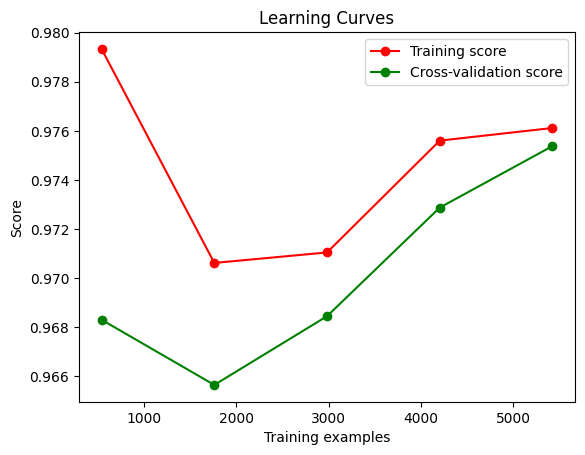

In [113]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


gnb = GaussianNB()
cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())


train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


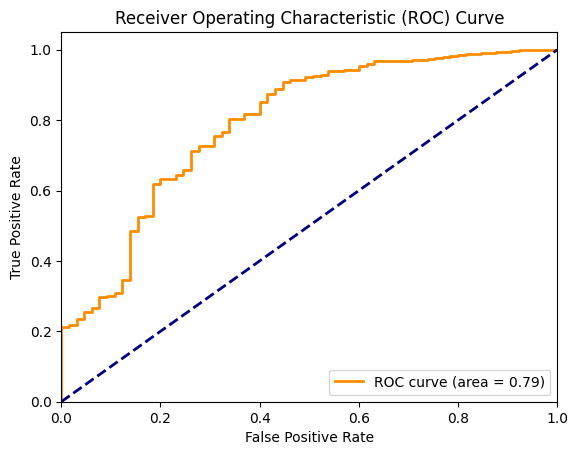

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

gnb.fit(X_train, Y_train)

y_score = gnb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
